<a href="https://colab.research.google.com/github/dnthanhtk/Multi-class-Classifiy/blob/main/kNNmultilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

In [ ]:
pf=pd.read_csv('/content/drive/MyDrive/TTS AI/crawldata/vnexpress_multilabel.csv')

In [ ]:
pf

,Unnamed: 0,tulieu,phantich,nguoivietnamchau,cuocsongdoday,quansu
0,0,Ấn Độ chạy đua với sóng thần Covid-19 thứ ba,Mỹ dịu giọng với Trung Quốc để điều tra nguồn ...,Mẹ Việt kể chi phí nuôi dạy con ở Trung Quốc,Bị bắt vì miệt thị người nhà quê,"Rơi máy bay quân sự, 12 người chết"
1,1,Đệ nhất phu nhân Mỹ nỗ lực đập tan kỳ thị vacc...,Trung Quốc phủ bóng chuyến công du đầu tiên củ...,Người Việt ở UAE hồi hộp trước giờ bóng lăn,Pháp gửi tượng Nữ thần Tự do thứ hai tới Mỹ,Gần 100 thủy thủ tàu hải quân Malaysia nhiễm n...
2,2,Ba năm FBI giăng bẫy bắt mạng lưới 800 tội phạ...,Trung Quốc trả giá với ngoại giao chiến lang,8 lao động Việt trong nhà máy Đài Loan dương t...,Đổ xăng đốt chồng đang ngủ say,Mỹ hoàn thiện oanh tạc cơ tàng hình B-21 đầu t...
3,3,Tổng thống Pháp được bảo vệ thế nào?,Sức lan tỏa không suy suyển của Trump trên mạn...,Giải cứu người Việt bị bắt cóc vì nợ nần,Nga tổ chức thi hoa khôi quản ngục,Thiết giáp Trung Quốc diễn tập đổ bộ gần đảo Đ...
4,4,Người gốc Á lo sợ Mỹ tái mở cửa,CIA lo bị 'chọc mù' trên chiến trường Afghanistan,Người Việt tại Đài Loan bình tĩnh trước sóng C...,"Võ sĩ 9 tuổi đấu Muay Thái để mua nhà, xe cho mẹ",Su-30 Nga ép tiêm kích F-35 đổi hướng
...,...,...,...,...,...,...
1015,1015,'Vua sòng bài' không đánh bạc của Macau,Trung Quốc nỗ lực viết lại câu chuyện về Covid-19,Người Việt tại Trung Quốc chia sẻ sự hưng phấn...,Xin lỗi vì video hở hang trên cầu thiêng Ấn Độ,Tiêm kích tàng hình F-35A ném thử bom hạt nhân
1016,1016,nCoV rình rập châu Âu,Covid-19 có thể khơi mào 'Chiến tranh Lạnh' Mỹ...,Fan Việt ở nước ngoài vỡ oà vì chiến thắng của...,Bé 3 tuổi bị diều cuốn lên không trung,"Nga, Thổ bất đồng về giám sát hòa bình ở Nagor..."
1017,1017,Lời thú tội muộn màng của kẻ giết người hàng loạt,ASEAN thúc đẩy phán quyết Biển Đông,Người Việt ở Mỹ háo hức thức đêm xem trận U23 ...,Bị bắt vì khỏa thân trên cầu thiêng Ấn Độ,Nga dọa đáp trả vụ Mỹ rút khỏi Hiệp ước Bầu tr...
1018,1018,Thực tế Covid-19 khác xa 'cúm vặt' ở Brazil,Nữ thống đốc Tokyo đối đầu với Thủ tướng Nhật,Vây cá mập tại Đại sứ quán Việt Nam ở Chile đư...,Cá heo mẹ tuyệt vọng cứu con giữa vùng biển tr...,"Cử tướng thăm Đài Loan, Trump có thể chọc giận..."


In [ ]:

tulieu=pf['tulieu'].tolist()
phantich=pf['phantich'].tolist()
nv5c=pf['nguoivietnamchau'].tolist()
csdd=pf['cuocsongdoday'].tolist()
quansu=pf['quansu'].tolist(
    
)

In [ ]:
text=[]
label=[]


In [ ]:
d=[tulieu,phantich,nv5c,csdd,quansu]
d

In [ ]:
i=-1
for d_ in d:
  i+=1
  for t in d_:
    text.append(t)
    label.append(i)

In [ ]:
i


4

In [ ]:
label[]

0

In [ ]:
file=pd.DataFrame({
    'text':text,
    'label': label
})

In [ ]:
file.to_csv('/content/drive/MyDrive/TTS AI/crawldata/data.csv')

In [ ]:
vectorizar=TfidfVectorizer()
vectorizar.fit(text)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text,label,test_size=0.3)

In [ ]:
X_train

['Tiêm kích Trung Quốc liên tiếp diễn tập sát đảo Đài Loan ',
 'Tranh cãi về cảnh sát quỳ gối cùng người biểu tình',
 'Nước Mỹ trầm lặng trước giao thừa',
 'Trung Quốc xây nhà cho dân để xóa đói nghèo ',
 'Biden xây đội ngũ cứng rắn với Trung Quốc',
 'Nhiều nghệ sĩ Việt kiều sẽ về biểu diễn Xuân Quê hương 2019 ',
 "Cắt mũi, xẻ lưỡi làm 'người ngoài hành tinh' ",
 'Những ông chủ Trung Quốc đi bán hàng rong',
 'Lý do biểu tình Mỹ biến thành bạo lực',
 'Hành trình kỳ diệu của cô bé có hai bà mẹ Pháp và Việt ',
 "Cú vấp chân từng châm ngòi vụ thảm sát chủng tộc 'Phố Wall Đen'",
 'Người gốc Việt bị bắt vì trộm trang sức ',
 'Du học sinh Việt Nam tại Hà Lan thi gói bánh chưng mừng Tết ',
 'Bộ Ngoại giao xác minh thông tin Malaysia bắt 41 người Việt ',
 "Triển vọng 'hộ chiếu vaccine' thời Covid-19",
 "Chuyên gia: Đảo chính Myanmar là 'bước thụt lùi dân chủ'",
 "Bê bối đạo văn 'nhấn chìm' lần tranh cử đầu tiên của Biden",
 'Trở dạ trên chuyến bay có bác sĩ, y tá ',
 "Mỹ, Pháp 'nín thở' dõi the

In [ ]:
X_train=vectorizar.transform(X_train)
X_train

<3570x3020 sparse matrix of type '<class 'numpy.float64'>'
	with 37138 stored elements in Compressed Sparse Row format>

In [ ]:
X_test=vectorizar.transform(X_test)

In [ ]:
scores=[]
list_k=np.arange(1,100)
for k in list_k :
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  score=knn.score(X_test,y_test)
  scores.append(score)
scores

[0.6405228758169934,
 0.5934640522875817,
 0.6418300653594772,
 0.6470588235294118,
 0.6477124183006536,
 0.661437908496732,
 0.6712418300653594,
 0.6725490196078432,
 0.677124183006536,
 0.6777777777777778,
 0.6823529411764706,
 0.681045751633987,
 0.6869281045751634,
 0.6862745098039216,
 0.6777777777777778,
 0.6901960784313725,
 0.6862745098039216,
 0.6888888888888889,
 0.6784313725490196,
 0.6888888888888889,
 0.6843137254901961,
 0.6901960784313725,
 0.6882352941176471,
 0.6908496732026144,
 0.6895424836601307,
 0.6934640522875817,
 0.6875816993464052,
 0.6908496732026144,
 0.6967320261437908,
 0.6895424836601307,
 0.6875816993464052,
 0.6915032679738562,
 0.6967320261437908,
 0.6967320261437908,
 0.7006535947712418,
 0.6973856209150326,
 0.6908496732026144,
 0.6901960784313725,
 0.6882352941176471,
 0.6901960784313725,
 0.6915032679738562,
 0.692156862745098,
 0.6973856209150326,
 0.6986928104575163,
 0.6980392156862745,
 0.6954248366013072,
 0.6941176470588235,
 0.69281045751633

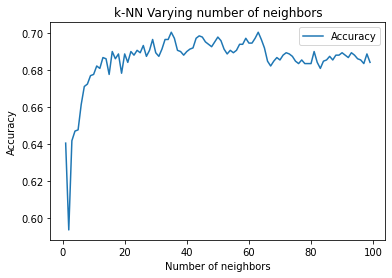

In [ ]:
import matplotlib.pyplot as plt

plt.title('k-NN Varying number of neighbors')
plt.plot(list_k, scores, label='Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=63)
knn.fit(X_train,y_train)
score=knn.score(X_test,y_test)
score

0.7006535947712418